In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [3]:

A=pd.read_csv("E:/Data Science class/Datasets/50_StartupsFinal.csv")

In [4]:
A['STATE'].astype('category')

0       New York
1     California
2        Florida
3       New York
4        Florida
5       New York
6     California
7        Florida
8       New York
9     California
10       Florida
11    California
12       Florida
13    California
14       Florida
15      New York
16    California
17      New York
18       Florida
19      New York
20    California
21      New York
22       Florida
23       Florida
24      New York
25    California
26       Florida
27      New York
28       Florida
29      New York
30       Florida
31      New York
32    California
33       Florida
34    California
35      New York
36       Florida
37    California
38      New York
39    California
40    California
41       Florida
42    California
43      New York
44    California
45      New York
46       Florida
47    California
48      New York
49    California
Name: STATE, dtype: category
Categories (3, object): [California, Florida, New York]

In [5]:
A.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [6]:
A.describe()

,RND,ADMIN,MKT,PROFIT
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
RND       50 non-null float64
ADMIN     50 non-null float64
MKT       50 non-null float64
STATE     50 non-null object
PROFIT    50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.0+ KB


In [8]:
import seaborn as sb
sb.pairplot(A)

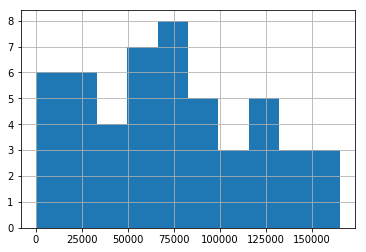

In [9]:
A.RND.hist()

In [10]:
E=[]
q=np.mean(A.PROFIT)
for i in A.PROFIT:
    if(i<q):
        E.append(0)
    else:
        E.append(1)

In [11]:
A['NP']=E

In [13]:
from sklearn.model_selection import train_test_split
X=A[['RND','MKT','ADMIN']]
Y=A[['NP']]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.2,random_state=20)

In [14]:
lr=LogisticRegression()
model=lr.fit(X_train,Y_train)
predicted=model.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
predicted

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

In [16]:
lr.predict_proba(X_test)

array([[5.54012245e-03, 9.94459878e-01],
       [1.28121018e-04, 9.99871879e-01],
       [3.04334336e-12, 1.00000000e+00],
       [7.24632055e-05, 9.99927537e-01],
       [1.00000000e+00, 2.16799559e-10],
       [5.33777245e-10, 9.99999999e-01],
       [9.94446145e-01, 5.55385469e-03],
       [1.56831708e-03, 9.98431683e-01],
       [1.00000000e+00, 2.03484050e-11],
       [7.77906436e-01, 2.22093564e-01]])

In [17]:
import sklearn.metrics as m
#calculate fpr & tpr for all thresholds of the classification
probs=lr.predict_proba(X_test)
preds=probs[:,1]
fpr,tpr,threshold=m.roc_curve(Y_test,preds)
roc_auc=m.auc(fpr,tpr)

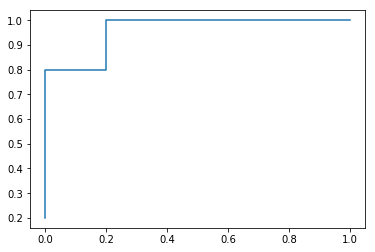

In [18]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,roc_auc)

In [19]:
roc_auc

0.9600000000000001

In [20]:
print(m.classification_report(Y_test,predicted))

             precision    recall  f1-score   support

          0       1.00      0.80      0.89         5
          1       0.83      1.00      0.91         5

avg / total       0.92      0.90      0.90        10



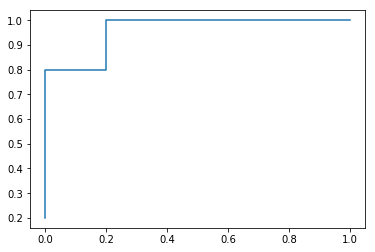

In [21]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,roc_auc)

In [22]:
m.classification_report(Y_test,predicted)

'             precision    recall  f1-score   support\n\n          0       1.00      0.80      0.89         5\n          1       0.83      1.00      0.91         5\n\navg / total       0.92      0.90      0.90        10\n'

In [23]:
m.roc_curve(Y_test,lr.predict_proba(X_test)[:,1])

(array([0. , 0. , 0.2, 0.2, 1. ]),
 array([0.2, 0.8, 0.8, 1. , 1. ]),
 array([1.00000000e+00, 9.99871879e-01, 9.98431683e-01, 9.94459878e-01,
        2.03484050e-11]))